# Импорт и установка пакетов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import plotly.graph_objects as go

## пример отсутсвующего пакета

In [ ]:
import pygmo as pg

ModuleNotFoundError: ignored

## установка пакета (локальная на время работы)

In [3]:
pip install pygmo

     |████████████████████████████████| 12.1MB 305kB/s 


In [4]:
import pygmo as pg

# Пример создания задачи оптимизации.Один критерий, без ограничений

In [5]:
# функция Растригина N-D
def RastriginFunction(var, A=1, b=1, c=1*np.pi):
  # var - vector numpy, single solution
  if np.isscalar(var):
    n=1
    var=[var]
  else:
    n=np.shape(var)[0]

  rez=0
  for x in var:
    rez+=A*x**2 - b*np.cos(c*x)
  return rez + n*b

In [6]:
# 1D

# область переменных
xMin = -5.12
xMax = 5.12

solutions1D = np.random.uniform(xMin, xMax, size=15)
fitness1D = np.array([])
for sol in solutions1D:
  fitness1D = np.append(fitness1D, RastriginFunction(sol, A=1, b=10, c=1*np.pi))

In [7]:
print(solutions1D)
print(fitness1D)

[-0.32971916  3.03006632  4.13641644 -3.55497672  4.4901038   1.16524374
 -1.36611293 -2.45960935  2.4786541   1.58333462  4.38529126  2.25335416
  3.12963659  3.08043099 -4.00157026]
[ 5.01070829 29.13672526 18.01431021 20.91928896 29.85018373 20.04031169
 15.94951705 14.78417092 15.47362727  9.91871907 25.704592    8.08143917
 28.97669964 29.17151057 16.01268619]


In [8]:
# 2D

solutions2D = np.random.uniform(xMin, xMax, size=(10,2))
fitness2D = np.array([])
for sol in solutions2D:
  fitness2D = np.append(fitness2D, RastriginFunction(sol, A=1, b=10, c=1*np.pi))

In [9]:
print(solutions2D)
print(fitness2D)

[[ 1.54058996  4.08931958]
 [ 0.34027737 -3.41291047]
 [ 3.53843028  2.67760601]
 [ 3.82499027  2.19125819]
 [-4.69019131  1.85510346]
 [ 1.67243381  3.94416437]
 [-1.43503822 -3.81170461]
 [-4.08236568  0.38253803]
 [ 1.20102473  0.67365391]
 [ 0.36330391  1.82848087]]
[28.21535526 29.6558386  43.78028639 22.65739746 42.08340175 23.35084425
 30.31433619 23.53796924 35.15635749 10.7286551 ]


# Визуализация с использованием Matplotlib

In [10]:
# точки для 1D графика функции
xFlat = np.linspace(xMin, xMax, num=200)
yFlat = np.array([])
for x in xFlat:
  yFlat = np.append(yFlat, RastriginFunction(x, A=1, b=10, c=1*np.pi))

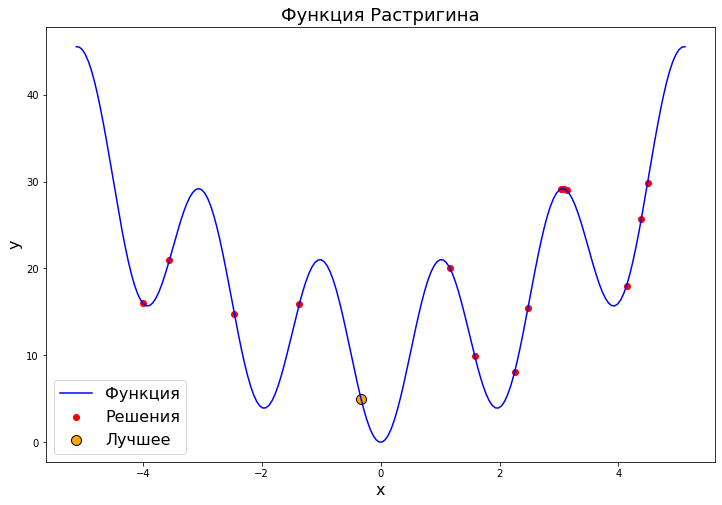

In [11]:
fig, ax = plt.subplots(figsize=(12,8))

# график функции
ax.plot(xFlat,yFlat, color='blue', label='Функция')
# точки - решения в популяции
ax.scatter(solutions1D, fitness1D, color='red', label='Решения')
# лучшее решение в популяции
yBest = np.min(fitness1D)
xBest = solutions1D[ np.argmin(fitness1D) ]
ax.scatter(xBest, yBest, color='orange', s=100, edgecolors='black', label='Лучшее')

ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.legend(fontsize=16)
ax.set_title('Функция Растригина', fontsize=18)

plt.show()

In [12]:
# для 3D нужно создать сетку по осям
x1 = np. linspace(xMin, xMax, 200)
x2 = np. linspace(xMin, xMax, 200)

X, Y = np.meshgrid(x1, x2)

# перебор всех пар (x1, x2)
points = np.vstack([X.ravel(), Y.ravel()])

# вычислив каждой точке и сделаем назад сетку 
z1 = np.zeros(200*200)
for i in range(len(points[0])):
  pair = np.array( [points[0][i], points[1][i]] )
  z1[i] = RastriginFunction(pair, A=1, b=10, c=1*np.pi)
# для построения графика массив Z должен иметь размерность такую же как и сетка 
Z = z1.reshape( (200,200) )

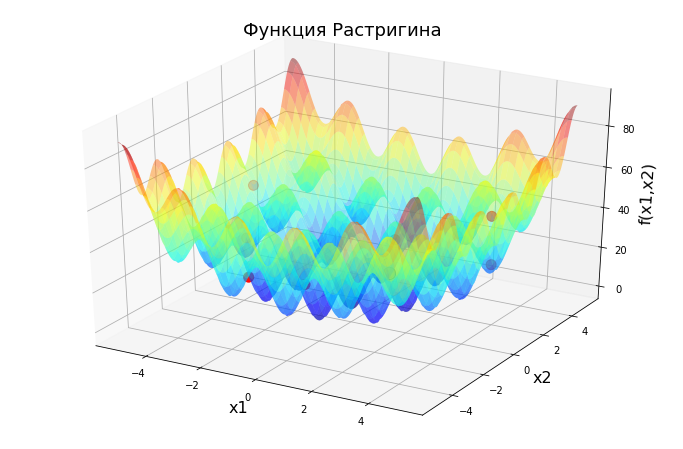

In [13]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

# график поверхности
ax.plot_surface(X,Y,Z, cmap=cm.jet, linewidth=0, alpha=0.45)
# точки - решения в популяции
ax.scatter(solutions2D[:,0], solutions2D[:,1], fitness2D,
           c='red', s=100)
# лучшее решение в популяции
y2Best=np.min(fitness2D)
x1Best=solutions2D[np.argmin(fitness2D) ,0]
x2Best=solutions2D[np.argmin(fitness2D) ,1]
ax.scatter(x1Best, x2Best, y2Best,
           c='orange', edgecolors='black', s=150)

ax.set_xlabel('x1', fontsize=16)
ax.set_ylabel('x2', fontsize=16)
ax.set_zlabel('f(x1,x2)', fontsize=16)

ax.set_title('Функция Растригина', fontsize=18)

plt.show()

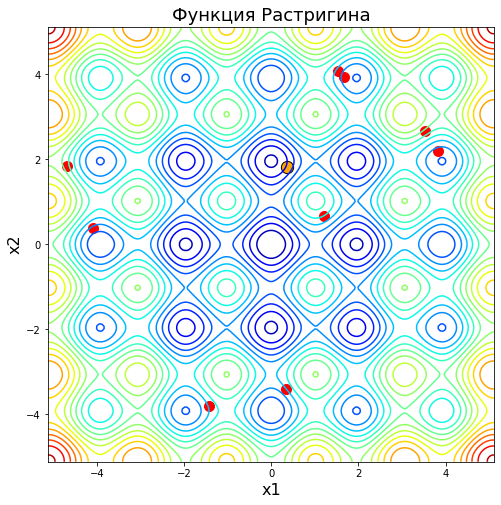

In [14]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()

# линии уровня
ax.contour(X,Y,Z, 20, cmap=cm.jet)

ax.scatter(solutions2D[:,0], solutions2D[:,1], c='red', s=100)

y2Best=np.min(fitness2D)
x1Best=solutions2D[np.argmin(fitness2D) ,0]
x2Best=solutions2D[np.argmin(fitness2D) ,1]
ax.scatter(x1Best, x2Best, c='orange', edgecolors='black', s=150)

ax.set_xlabel('x1', fontsize=16)
ax.set_ylabel('x2', fontsize=16)

ax.set_title('Функция Растригина', fontsize=18)

plt.show()

# Визуализация в Plotly

In [18]:
# создание пустого объекта
fig = go.Figure()

# добавить слой графики - поверхность
fig.add_trace( go.Surface(z=Z, x=X, y=Y, colorscale='Jet', opacity=0.75) )
# точки - решения в популяции
fig.add_trace(go.Scatter3d(
    x=solutions2D[:,0], y=solutions2D[:,1], z=fitness2D, 
    mode='markers', 
    marker=dict(size=5, color='red', line=dict(color='black', width=1))
    ))
# лучшее решение в популяции
yBest2=np.min(fitness2D)
x1Best2=solutions2D[np.argmin(fitness2D),0]
x2Best2=solutions2D[np.argmin(fitness2D),1]
fig.add_trace(go.Scatter3d(
    x=[x1Best2], y=[x2Best2], z=[yBest2],
    mode='markers', 
    marker=dict(size=5, color='orange', line=dict(color='black', width=1))
    ))

# layout - прочие настройки графики в plotly
fig.update_layout(
    width=800,
    height=600,
    yaxis=dict(range=[-5.12, 5.12]),
    xaxis=dict(range=[-5.12, 5.12]),
    scene=dict(
        yaxis=dict(title='x2', range=[-5.12, 5.12]),
        xaxis=dict(title='x1', range=[-5.12, 5.12]),
        zaxis=dict(title='f(x1,x2)'),
    ),
    showlegend=False,
)

fig.show()

In [30]:
fig = go.Figure()

fig.add_trace( go.Contour(x=x1, y=x2, z=Z, 
                          contours=dict(coloring='heatmap', showlabels = True, 
                                        labelfont = dict(size = 10, color = 'black')), 
                          colorscale='Jet', line_smoothing=1) )

fig.add_scatter(x=solutions2D[:,0], y=solutions2D[:,1], 
                mode='markers', 
                marker=dict(size=8, color='red', line=dict(color='black', width=1)))

yBest2=np.min(fitness2D)
x1Best2=solutions2D[np.argmin(fitness2D),0]
x2Best2=solutions2D[np.argmin(fitness2D),1]
fig.add_scatter(x=[x1Best2], y=[x2Best2], 
                mode='markers', 
                marker=dict(size=8, color='orange', line=dict(color='black', width=1)))

fig.update_layout(
    width=600,
    height=600,
    yaxis=dict(title='x2', range=[-5.12, 5.12]),
    xaxis=dict(title='x1', range=[-5.12, 5.12]),

    showlegend=False,
    title=dict(
        text='Функция Растригина',
        font=dict(size=24),
        ),
    title_x=0.5,
)

fig.show()

Пример анимации в Plotly

https://plotly.com/python/animations/#animated-figures-with-plotly-express

# Задачи из пакетов. Пример pygmo

в pygmo можно задать любую другую функцию, интерфейс подробно описан тут

https://esa.github.io/pygmo2/problem.html

или использовать одну из встроенных тестовых

In [31]:
# Функция Экли с 2мя переменными из pygmo
prob = pg.problem(pg.ackley(dim=2))
# выведем информацию о функции
print(prob)

Problem name: Ackley Function
	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-15, -15]
	Upper bounds: [30, 30]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: basic



In [33]:
print('Лучшее известное решение (глобальный оптимум):', pg.ackley(dim=2).best_known() )

Лучшее известное решение (глобальный оптимум): [0. 0.]


In [34]:
prob.fitness(np.array([-1, 2.5]))

array([8.05183601])

График функции Экли

In [35]:
x1=np.linspace(-15,30,200)
x2=np.linspace(-15,30,200)
X,Y = np.meshgrid(x1,x2)

# для вычисления функции Экли нужны пары (x,y), соберем все точки сетки в массив пар (x,y)
positions = np.vstack([X.ravel(), Y.ravel()])

# вычислим значение функции в каждой точке
z1=np.zeros(40000)
for i in range(len(positions[0])):
    z1[i]=prob.fitness(np.array([positions[0][i],positions[1][i]]))

# для построения графика массив z должен иметь размерность такую же как и сетка 
Z=z1.reshape((200,200))

In [43]:
# создание пустого объекта
fig = go.Figure()

# добавить слой графики - поверхность
fig.add_trace( go.Surface(z=Z, x=X, y=Y, colorscale='Jet', opacity=0.75) )

# layout - прочие настройки графики в plotly
fig.update_layout(
    width=800,
    height=600,
    yaxis=dict(range=[-15, 30]),
    xaxis=dict(range=[-15, 30]),
    scene=dict(
        yaxis=dict(title='x2', range=[-15, 30]),
        xaxis=dict(title='x1', range=[-15, 30]),
        zaxis=dict(title='f(x1,x2)', range=[-1, 25]),
    ),
    showlegend=False,
    title=dict(
        text='Функция Экли',
        font=dict(size=24),
        ),
    title_x=0.5,
)

fig.show()

In [45]:
fig = go.Figure()

fig.add_trace( go.Contour(x=x1, y=x2, z=Z, 
                          contours=dict(coloring='heatmap', showlabels = True, 
                                        labelfont = dict(size = 10, color = 'black')), 
                          colorscale='Jet', line_smoothing=1) )

fig.update_layout(
    width=600,
    height=600,
    yaxis=dict(title='x2', range=[-15, 30]),
    xaxis=dict(title='x1', range=[-15, 30]),

    showlegend=False,
    title=dict(
        text='Функция Экли',
        font=dict(size=24),
        ),
    title_x=0.5,
)

fig.show()

# Некоторые пакеты

https://pymoo.org/

https://deap.readthedocs.io/en/master/api/benchmarks.html 

https://pypi.org/project/optproblems/

https://pypi.org/project/pygmo/